**Author:** Prof. AJ Smit

Department of Biodiversity and Conservation Biology

University of the Western Cape

# Biodiversity

## Three measures of biodiversity

Three measures of diversity were coined by Whittaker in 1972. They represent the measurement of biodiversity across different spatial scales. α- and γ-diversity simply express the total number of species in an area. α-diversity is a representation of the number of species at the small (local) scale, such as within a quadrat, transect, plot, or trawl. Multiples of these are nested within a larger region (or ecosystem etc.) and serve as replicates, and it is the complete number of species across all of these replicates that indicates the diversity at a larger scale---this is called γ-diversity.

β-diversity is something else, and will be discussed below.

We will use data on seaweed of South Africa to demonstrate these ideas.

# The South African seaweed data

For this example we will use the seaweed data of Smit et al. (2017). For information about the study, see:

https://github.com/ajsmit/Quantitative_Ecology/blob/main/_GitBook/LaTeX/The_seaweed_data.pdf

I use two data sets. The first, $Y$ (in the file `seaweeds.csv`), comprises distribution records of 847 macroalgal species within each of 58 × 50 km-long sections of the South African coast (updated from Bolton and Stegenga  2002). This represents *ca*. 90% of the known seaweed flora of South Africa, but excludes some very small and/or very rare species for which data are insufficient. The data are from verifiable literature sources and John Bolton and Rob Anderson's own collections, assembled from information collected by teams of phycologists over three decades (Bolton 1986; Stegenga et al. 1997; Bolton and Stegenga 2002; De Clerck et al. 2005). The second, $E$ (in `env.csv`), is a dataset of *in situ* coastal seawater temperatures (Smit et al. 2013) derived from daily measurements over up to 40 years.

## Setting up the analysis environment
This is **R**, so first I need to find, install and load various packages. Some of the packages will be available on CRAN and can be accessed and installed in the usual way, but others will have to be downloaded from [R Forge](https://r-forge.r-project.org/R/?group_id=195).

In [1]:
library(tidyverse)
library(betapart)
library(vegan)
library(gridExtra)
library(BiodiversityR)
library(grid)
library(gridBase)
library(tidyr)

── Attaching packages ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: permute

Loading required package: lattice

This is vegan 2.5-7


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: tcltk

Registered S3 methods overwritten by 'lme4':
  method                          from
  cooks.distance.influence.merMod car 
  influence.merMod                car 
  dfbeta.influence.merMod         car 
  dfbetas.i

## A look at the data

Let's load the data and see how it is structured:

In [23]:
spp <- read.csv('/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/SeaweedsSpp.csv')
spp <- dplyr::select(spp, -1)

In [24]:
# Lets look at the data:
dim(spp)

[1]  58 847

We see that our dataset has 58 rows and 847 columns. What is in the columns and rows? Start with the first 5 rows and 5 columns:

In [4]:
spp[1:5, 1:5]

,ACECAL,ACEMOE,ACRVIR,AROSP1,ANAWRI
,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0


Now the last 5 rows and 5 columns:

In [5]:
spp[(nrow(spp) - 5):nrow(spp), (ncol(spp) - 5):ncol(spp)]

,WOMKWA,WOMPAC,WRAARG,WRAPUR,WURMIN,ZONSEM
,<int>,<int>,<int>,<int>,<int>,<int>
53,0,0,1,0,0,0
54,0,0,1,0,0,0
55,0,0,1,0,0,0
56,0,1,1,0,1,0
57,1,0,1,0,1,0
58,0,0,1,0,1,0


So, each of the rows corresponds to a site (i.e. each of the coastal sections), and the columns each contain a species. The species are arranged alphabetically, and they are indicated by a six-letter code.

## Alpha diversity

We can represent α-diversity in three ways:

1. as species richness ($S$),

2. as a univariate diversity index, such as Shannon diversity ($H'$) or Simpson's diversity (λ), or

3. as a dissimilarity index, e.g. Bray-Curtis, Jaccard, or Sørensen dissimilarities---see Koleff (2003) for many more; also see `?vegdist`

We will work through each in turn.

### Species richness

First, species richness. In the seaweed biodiversity data---because we view each coastal section as the local scale (the smallest unit of sampling)---I simply count the number of species within each of the sections. The `diversityresult()` function in the **BiodiversityR** package does this easily:

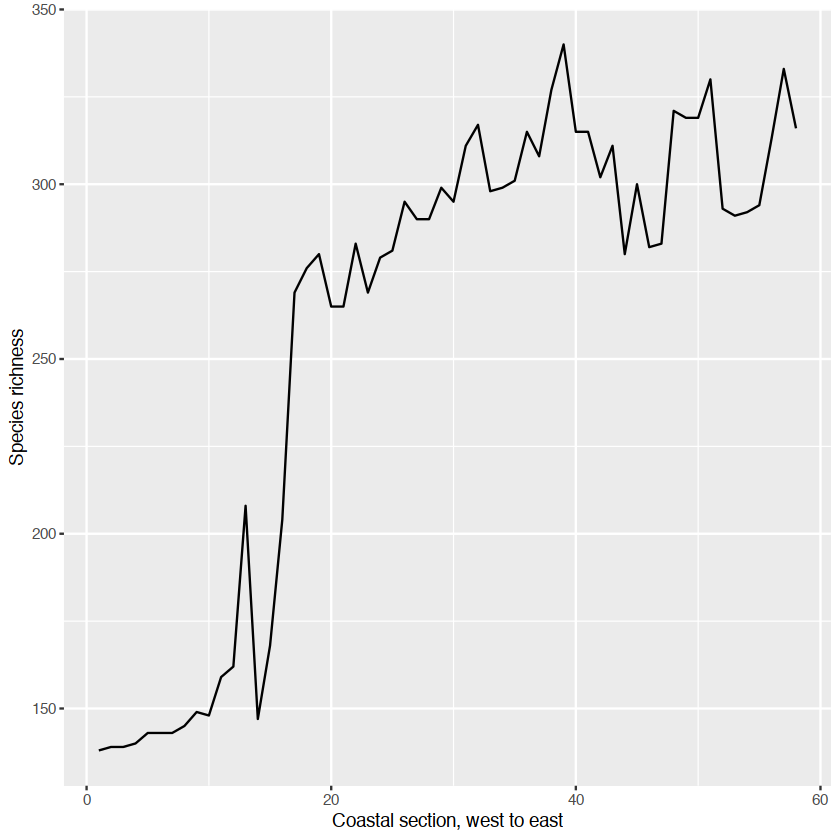

In [6]:
spp_richness <- diversityresult(spp, index = 'richness', method = 'each site')
# spp_richness
ggplot(data = spp_richness, (aes(x = 1:58, y = richness))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("Species richness")

If the **BiodiversityR** package does not work for you, there is also the `specnumber()` function in **vegan**:

In [7]:
# Use 'MARGIN = 1' to calculate the number of species within each row (site)
specnumber(spp, MARGIN = 1)

[1] 138 139 139 140 143 143 143 145 149 148 159 162 208 147 168 204 269 276 280
[20] 265 265 283 269 279 281 295 290 290 299 295 311 317 298 299 301 315 308 327
[39] 340 315 315 302 311 280 300 282 283 321 319 319 330 293 291 292 294 313 333
[58] 316

In other instances, it makes more sense to calculate the mean species richness of all the sampling units (e.g. quadrats) taken inside the ecosystem of interest. You will have to decide based on your own data.

### Univariate diversity indices

The second way in which we can express α-diversity is to use one of the univariate diversity indices such as Shannon's $H'$ or Simpson's λ. Shannon's $H'$ is sometimes called Shannon's diversity index, the Shannon–Wiener index, the Shannon–Weaver index, or the Shannon entropy. It is calculated as $H' = -\sum_{i=1}^{R} p_{i} \ln p_{i}$ where $p_{i}$ is the proportion of individuals belonging to the $i$th species, and $R$ is the species richness.

Simpson's λ, or simply the Simpson index, is calculated as $\displaystyle \lambda = \sum_{i=1}^{R} p_{i}^{2}$ where $R$ is the species richness and $p_{i}$ is the relative abundance of the $i$th species.

We cannot calculate either of these for the seaweed data because in order to do so we require abundance data---the seaweed data are presence-absence only. Let's load a fictitious dataset of the diversity of three different communities of plants, with each community corresponding to a different light environment (dim, mid and high light):

In [8]:
light <- read.csv("/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/light_levels.csv")
light

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/Users/ajsmit/Dropbox/R/workshops/Quantitative_Ecology/exercises/diversity/light_levels.csv'”


Site,A,B,C,D,E,F
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
low_light,0.75,0.62,0.24,0.33,0.21,0.14
mid_light,0.38,0.15,0.52,0.57,0.28,0.29
high_light,0.08,0.15,0.18,0.52,0.54,0.56


We can see above that in stead of having data with 1s and 0s for presence-absence, here we have some values that indicate the relative amounts of each of the species in the three light environments. We calculate species richness (as before), and also the Shannon and Simpson indices using **vegan**'s `diversity()` function:

In [9]:
light_div <- data.frame(
  site = c("low_light", "mid_light", "high_light"),
  richness = specnumber(light[, 2:7], MARGIN = 1),
  shannon = round(diversity(light[, 2:7], MARGIN = 1, index = "shannon"), 2),
  simpson = round(diversity(light[, 2:7], MARGIN = 1, index = "simpson"), 2)
)
light_div

site,richness,shannon,simpson
<chr>,<int>,<dbl>,<dbl>
low_light,6,1.62,0.78
mid_light,6,1.71,0.81
high_light,6,1.59,0.77


### Dissimilarity indices

In this section we will cover the dissimilarity indices, which are special cases of diversity indices that use pairwise comparisons between sampling units, habitats, or ecosystems. Both α- and β-diversity can be expressed as dissimilarity indices, but let deal with α-diversity first.

These dissimilarity indices are multivariate and compare between sites, sections, plots, etc., and must therefore not be confused with the univariate diversity indices.

Recall from the lecture slides the Bray-Curtis and Jaccard dissimilarity indices for abundance data, and the Sørensen dissimilarity index for presence-absence data. The seaweed dataset is a presence-absence dataset, so we will use the Sørensen index. The interpretation of the resulting square (number of rows = number of columns) dissimilarity matrices is the same regardless of whether it is calculated for an abundance dataset or a presence-absence dataset. The values range from 0 to 1, with 0 meaning that the pair of sites being compared is identical (i.e. 0 dissimilarity) and 1 means the pair of sites is completely different (no species in common, hence 1 dissimilarity). In the square dissmilarity matrix the diagonal is 0, which essentially (and obviously) means that any site is identical to itself. Elsewhere the values will range from 0 to 1. Since this is a pairwise calculation (each site compared to every other site), our seaweed dataset will contain (58 × (58 - 1))/2 = 1653 values, each one ranging from 0 to 1.

The first step involves the species table ($Y$). First we compute the Sørensen dissimilarity index ($\beta_{\text{sør}}$) to compare the dissimilarity of all pairs of coastal sections using on presence-absence data. The dissimilarity in species composition between two sections is calculated from three parameters, *viz*., *b* and *c*, which represent the number of species unique to each of two sites, and *a*, the number of species in common between them. It is given by:

$$\beta_\text{sør}=\frac{b+c}{2a+b+c}$$


The **vegan** function `vegdist()` provides access to the dissimilarity indices. We calculate the Sørensen dissimilarity index:

In [10]:
sor <- vegdist(spp, binary = TRUE) # binary = TRUE sets to presence/absence data
sor_df <- round(as.matrix(sor), 4)
sor_df[1:20, 1:20] # the first 20 rows and columns

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.0000,0.0036,0.0036,0.0072,0.0249,0.0391,0.0391,0.0459,0.0592,0.0629,0.0976,0.1067,0.2254,0.0737,0.1503,0.2515,0.4005,0.4783,0.5072,0.5335
2,0.0036,0.0000,0.0000,0.0036,0.0213,0.0355,0.0355,0.0423,0.0556,0.0592,0.0940,0.1030,0.2219,0.0769,0.1531,0.2536,0.4020,0.4795,0.5084,0.5347
3,0.0036,0.0000,0.0000,0.0036,0.0213,0.0355,0.0355,0.0423,0.0556,0.0592,0.0940,0.1030,0.2219,0.0769,0.1531,0.2536,0.4020,0.4795,0.5084,0.5347
4,0.0072,0.0036,0.0036,0.0000,0.0177,0.0318,0.0318,0.0386,0.0519,0.0556,0.0903,0.0993,0.2184,0.0801,0.1558,0.2558,0.4034,0.4808,0.5095,0.5358
5,0.0249,0.0213,0.0213,0.0177,0.0000,0.0140,0.0140,0.0208,0.0342,0.0378,0.0728,0.0820,0.2023,0.0897,0.1640,0.2622,0.4078,0.4845,0.5130,0.5392
6,0.0391,0.0355,0.0355,0.0318,0.0140,0.0000,0.0000,0.0069,0.0205,0.0241,0.0596,0.0689,0.1909,0.0897,0.1640,0.2622,0.4078,0.4845,0.5130,0.5392
7,0.0391,0.0355,0.0355,0.0318,0.0140,0.0000,0.0000,0.0069,0.0205,0.0241,0.0596,0.0689,0.1909,0.0897,0.1640,0.2622,0.4078,0.4845,0.5130,0.5392
8,0.0459,0.0423,0.0423,0.0386,0.0208,0.0069,0.0069,0.0000,0.0136,0.0171,0.0526,0.0619,0.1841,0.0959,0.1693,0.2665,0.4106,0.4869,0.5153,0.5415
9,0.0592,0.0556,0.0556,0.0519,0.0342,0.0205,0.0205,0.0136,0.0000,0.0034,0.0390,0.0482,0.1709,0.1081,0.1798,0.2748,0.4163,0.4918,0.5198,0.5459
10,0.0629,0.0592,0.0592,0.0556,0.0378,0.0241,0.0241,0.0171,0.0034,0.0000,0.0358,0.0452,0.1685,0.1051,0.1772,0.2727,0.4149,0.4906,0.5187,0.5448


What we see above is a square dissimilarity matrix. The two most important characteristics of the matrix are:

i. Whereas the raw species data ($Y$) is rectangular (number rows ≠ number columns), the dissimilarity matrix is square (number rows = number columns).

ii. The diagonal is filled with 0.

iii. The matrix is symetrical---it is comprised of symetrical upper and lower triangles.

**Questions**

1. Why is the matrix square, and what determines the number of rows/columns?

1. What is the meaning of the diagonal?

2. What is the meaning of the non-diagonal elements?

3. Take the data in row 1 and create a line graph that shows these values as a function of section number.

4. Provide a mechanistic (ecological) explanation for why this figure takes the shape that it does.

Submit an R script wherein you provide answers to these questions by no later than 17:00 on Wednesday 30 June 2021.

## Gamma diversity

Returning again to the seaweed data, $Y$, lets now look at λ-diversity---this would simply be the total number of species along the South African coastline in all 58 coastal sections. Since each column represents one species, and the dataset contains data collected at each of the 58 sites (the number of rows), we can simply do:

In [11]:
# the number of columns gives the total number of species in this example:
ncol(spp)

[1] 847

We can also use:

In [12]:
diversityresult(spp, index = 'richness', method = 'pooled')

,richness
,<dbl>
pooled,846


**Questions**

1. Why is there a difference between the two? 

2. Which is correct?

Think before you calculate γ-diversity for your own data as it might not be as simple as here!
 
## Whittaker's concept of β-diversity

The first measure of β-diversity comes from Whittaker (1960) and is called *true β-diversity*. This is simply dividing the γ-diversity for the region by the α-diversity for a specific coastal section. We can calculate it all at once for the whole dataset and make a graph:

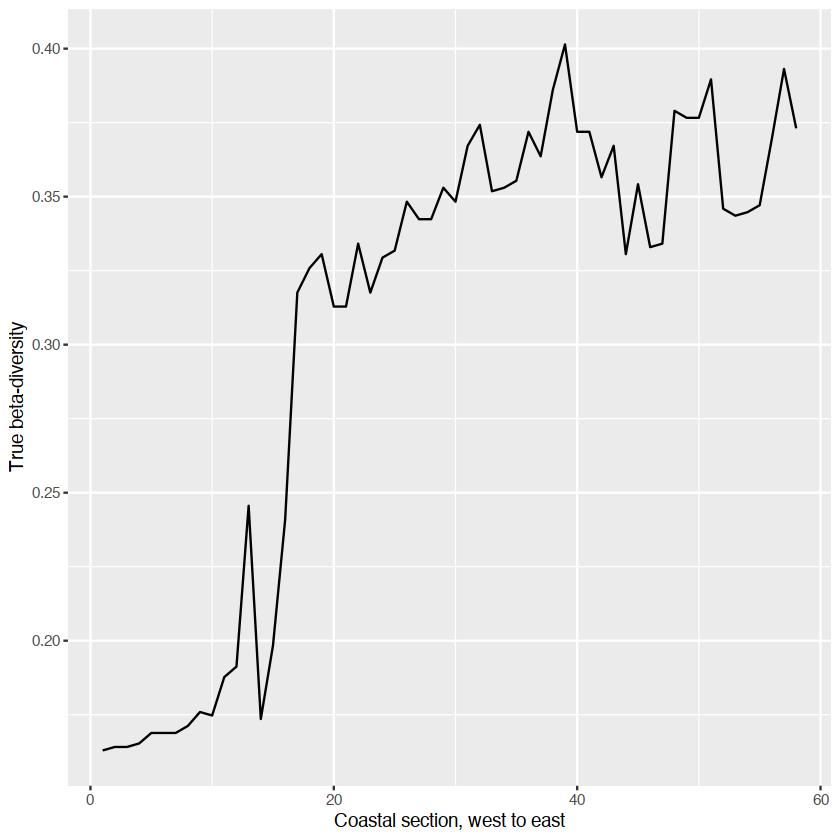

In [13]:
true_beta <- data.frame(
  beta = specnumber(spp, MARGIN = 1) / ncol(spp),
  section_no = c(1:58)
)
# true_beta
ggplot(data = true_beta, (aes(x = section_no, y = beta))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("True beta-diversity")

The second measure of β-diversity is *absolute species turnover*, and to calculate this we simply simply substract α-diversity for each section from the region's γ-diversity:

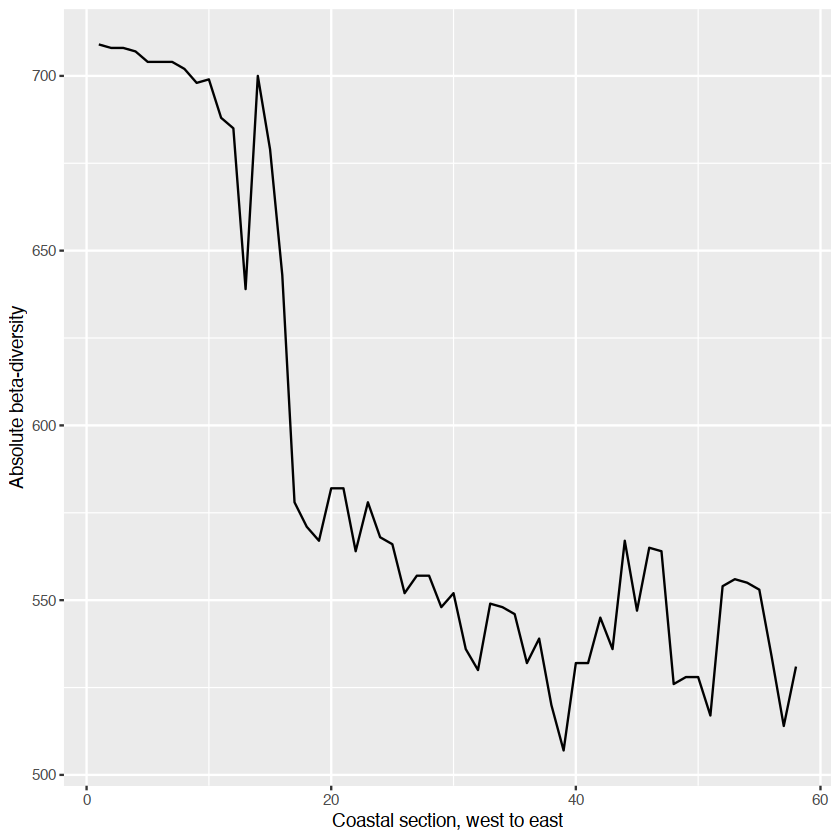

In [14]:
abs_beta <- data.frame(
  beta = ncol(spp) - specnumber(spp, MARGIN = 1),
  section_no = c(1:58)
)
# abs_beta
ggplot(data = abs_beta, (aes(x = section_no, y = beta))) +
  geom_line() + xlab("Coastal section, west to east") + ylab("Absolute beta-diversity")

## Contemporary definitions β-diversity

β-diversity is a concept that describes how species assemblages (communities) measured within the ecosystem of interest vary from place to place, e.g. between the various transects or quadrats used to sample the ecosystem. β-diversity results from habitat heterogeneity (along gradients, or randomly). We have already seen two concepts of β-diversity, viz. true β-diversity and absolute species turnover---both of these rely on knowledge of species richness at local (a measure of α-diversity) and regional (γ-diversity) scales. Much more insight into species assembly processes can be extracted, however, when we view β-diversity as a dissmilarity index. In this view, we will see that there are two processes by which β-diversity might be affected (i.e. in which the patterning of communities over landscapes might arise):

**Process 1:** If a region is comprised of the species A, B, C, …, M (i.e. γ-diversity is 13), a subset of the regional flora as captured by one quadrat might be species **A**, **D**, E, whereas in another quadrat it might be species **A**, **D**, F. In this instance, the α-diversity is 3 in both instances, and heterogeneity (and hence β-diversity) results from the fact that the first quadrat has species E but the other has species F. In other words, here we have the same number of species in both quadrats, but only two of the species are the same. The process responsible for this form of β-diversity is species ‘turnover’ ($\beta_\text{sim}$). Turnover refers to processes that cause communities to differ due to species being lost and/or gained from section to section, i.e. the species composition changes between sections without corresponding changes in α-diversity.

**Process 2:** Consider again species A, B, C, …, M. Now we have the first quadrat with species **A**, **B**, C, D, **G**, H (α-diversity is 6) and the second quadrat has a subset of this, e.g. only species **A**, **B**, **G** (α-diversity 3). Here, β-diversity comes from the fact that even if the two places share the same species, the number of species can still differ amongst the quadrats (i.e. from place to place) due to one quadrat capturing only a subset of species present in the other. This form of β-diversity is called ‘nestedness-resultant’ β-diversity ($\beta_\text{sne}$), and it refers to  processes that cause species to be gained or lost, and the community with the lowest α-diversity is a subset of the richer community.

The above two examples show that β-diversity is coupled not only with the identity of the species in the quadrats, but also α-diversity---with species richness in particular.

We express β-diversity as ‘nestedness-resultant’ ($\beta_\text{sne}$) and ‘turnover’ ($\beta_\text{sim}$) components so as to be able to distinguish between these two processes. It allows us to make inferences about the two possible drivers of β-diversity. Turnover refers to processes that cause communities to differ due to species being lost and/or gained from section to section, i.e. the species composition changes between sections without corresponding changes in α-diversity. The nestedness-resultant component implies processes that cause species to be gained or lost without replacement, and the community with the lowest α-diversity is a subset of the richer community.

How do we calculate the turnover and nestedness-resultant components of β-diversity? The **betapart** package (Baselga et al. 2017) comes to the rescue. We decompose the dissimilarity into the $\beta_\text{sim}$ and $\beta_\text{sne}$ components (Baselga 2010) using the `betapart.core()` and `betapart.pair()` functions. The outcomes of this partitioning calculation are placed into the matrices $Y1$ and $Y2$. These data can then be analysed further---e.g. we can apply a principal components analysis (PCA) or another multivariate analysis on $Y$ to find the major patterns in the community data---we will do this in a later section.

What can we do with these two forms of β-diversity? What do they mean? Let's do a deeper analysis and create a figure to demonstrate these findings. I regress $\beta_{\text{sør}}$ on the spatial distance between section pairs (see below) and on the environmental distance ($\beta_{\text{E}}$) in each bioregion and used the magnitude of the slope (per 100 km) of this relationship as a metric of β-diversity or ‘distance decay’ of dissimilarity. Since the connectivity between sections is constrained by their location along a shoreline, we calculated the distances between sections not as ‘as the crow flies’ distances (e.g. Section 1 is not connected in a straight line to Section 58 because of the intervening land in-between), but as the great circle geodesic distances between each pair of sections along a ‘route’. Traveling from **1** to **58** therefore requires visiting **2**, then **3**, and eventually all the way up to **58**. The total distance between a pair of arbitrary sections is thus the cumulative sum of the great circle distances between each consecutive pair of intervening sections along the route.

In [15]:
# Decompose total Sørensen dissimilarity into turnover and nestedness-resultant components:
Y.core <- betapart.core(spp)
Y.pair <- beta.pair(Y.core, index.family = "sor")

# Let Y1 be the turnover component (beta-sim):
Y1 <- as.matrix(Y.pair$beta.sim)

# Let Y2 be the nestedness-resultant component (beta-sne):
Y2 <- as.matrix(Y.pair$beta.sne)

In [16]:
round(Y1[1:10, 1:20], 4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.0000,0.0000,0.0000,0.0000,0.0072,0.0217,0.0217,0.0217,0.0217,0.0290,0.0290,0.0290,0.0290,0.0435,0.0580,0.0725,0.1159,0.2174,0.2536,0.3188
2,0.0000,0.0000,0.0000,0.0000,0.0072,0.0216,0.0216,0.0216,0.0216,0.0288,0.0288,0.0288,0.0288,0.0504,0.0647,0.0791,0.1223,0.2230,0.2590,0.3237
3,0.0000,0.0000,0.0000,0.0000,0.0072,0.0216,0.0216,0.0216,0.0216,0.0288,0.0288,0.0288,0.0288,0.0504,0.0647,0.0791,0.1223,0.2230,0.2590,0.3237
4,0.0000,0.0000,0.0000,0.0000,0.0071,0.0214,0.0214,0.0214,0.0214,0.0286,0.0286,0.0286,0.0286,0.0571,0.0714,0.0857,0.1286,0.2286,0.2643,0.3286
5,0.0072,0.0072,0.0072,0.0071,0.0000,0.0140,0.0140,0.0140,0.0140,0.0210,0.0210,0.0210,0.0210,0.0769,0.0909,0.1049,0.1469,0.2448,0.2797,0.3427
6,0.0217,0.0216,0.0216,0.0214,0.0140,0.0000,0.0000,0.0000,0.0000,0.0070,0.0070,0.0070,0.0070,0.0769,0.0909,0.1049,0.1469,0.2448,0.2797,0.3427
7,0.0217,0.0216,0.0216,0.0214,0.0140,0.0000,0.0000,0.0000,0.0000,0.0070,0.0070,0.0070,0.0070,0.0769,0.0909,0.1049,0.1469,0.2448,0.2797,0.3427
8,0.0217,0.0216,0.0216,0.0214,0.0140,0.0000,0.0000,0.0000,0.0000,0.0069,0.0069,0.0069,0.0069,0.0897,0.1034,0.1172,0.1586,0.2552,0.2897,0.3517
9,0.0217,0.0216,0.0216,0.0214,0.0140,0.0000,0.0000,0.0000,0.0000,0.0000,0.0067,0.0067,0.0067,0.1020,0.1275,0.1409,0.1812,0.2752,0.3087,0.3691
10,0.0290,0.0288,0.0288,0.0286,0.0210,0.0070,0.0070,0.0069,0.0000,0.0000,0.0000,0.0000,0.0000,0.1020,0.1216,0.1351,0.1757,0.2703,0.3041,0.3649


In [17]:
round(Y2[1:10, 1:20], 4)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.0000,0.0036,0.0036,0.0072,0.0177,0.0174,0.0174,0.0242,0.0375,0.0340,0.0687,0.0777,0.1964,0.0302,0.0924,0.1790,0.2845,0.2609,0.2536,0.2147
2,0.0036,0.0000,0.0000,0.0036,0.0141,0.0139,0.0139,0.0207,0.0340,0.0305,0.0652,0.0742,0.1931,0.0266,0.0883,0.1745,0.2797,0.2565,0.2494,0.2109
3,0.0036,0.0000,0.0000,0.0036,0.0141,0.0139,0.0139,0.0207,0.0340,0.0305,0.0652,0.0742,0.1931,0.0266,0.0883,0.1745,0.2797,0.2565,0.2494,0.2109
4,0.0072,0.0036,0.0036,0.0000,0.0105,0.0104,0.0104,0.0172,0.0305,0.0270,0.0617,0.0708,0.1898,0.0230,0.0844,0.1701,0.2749,0.2522,0.2452,0.2072
5,0.0177,0.0141,0.0141,0.0105,0.0000,0.0000,0.0000,0.0068,0.0203,0.0168,0.0519,0.0610,0.1813,0.0127,0.0731,0.1574,0.2609,0.2397,0.2333,0.1966
6,0.0174,0.0139,0.0139,0.0104,0.0000,0.0000,0.0000,0.0069,0.0205,0.0171,0.0526,0.0619,0.1839,0.0127,0.0731,0.1574,0.2609,0.2397,0.2333,0.1966
7,0.0174,0.0139,0.0139,0.0104,0.0000,0.0000,0.0000,0.0069,0.0205,0.0171,0.0526,0.0619,0.1839,0.0127,0.0731,0.1574,0.2609,0.2397,0.2333,0.1966
8,0.0242,0.0207,0.0207,0.0172,0.0068,0.0069,0.0069,0.0000,0.0136,0.0102,0.0457,0.0550,0.1772,0.0062,0.0659,0.1492,0.2520,0.2318,0.2256,0.1897
9,0.0375,0.0340,0.0340,0.0305,0.0203,0.0205,0.0205,0.0136,0.0000,0.0034,0.0322,0.0415,0.1642,0.0061,0.0523,0.1338,0.2351,0.2166,0.2111,0.1768
10,0.0340,0.0305,0.0305,0.0270,0.0168,0.0171,0.0171,0.0102,0.0034,0.0000,0.0358,0.0452,0.1685,0.0030,0.0556,0.1376,0.2392,0.2203,0.2146,0.1799


**Questions**

1. Plot species turnover as a function of Section number, and provide a mechanistic exaplanation for the pattern observed.

2. Based on an assessment of literature on the topic, provide a discussion of nestedness-resultant β-diversity. Use either a marine or terrestrial example to explain this mode of structuring biodiversity.

Submit an R script wherein you provide answers to these questions by no later than 17:00 on Friday 2 July 2021.

# References

Baselga, A. (2010). Partitioning the turnover and nestedness components of beta diversity. Global Ecology and Biogeography 19, 134–143.

Baselga, A., Orme, D., Villeger, S., De Bortoli, J., and Leprieur, F. (2017). betapart: Partitioning Beta Diversity into Turnover and Nestedness Components. R package version 1.4-1.

Bolton, J. J. (1986). Marine phytogeography of the Benguela upwelling region on the west coast of southern Africa: A temperature dependent approach. Botanica Marina 29, 251–256.

Bolton, J. J., and Stegenga, H. (2002). Seaweed species diversity in South Africa. South African Journal of Marine Science 24, 9–18.

De Clerck, O., Bolton, J. J., Anderson, R. J., and Coppejans, E. (2005). Guide to the seaweeds of KwaZulu- Natal. Scripta Botanica Belgica 33, 294 pp.

Koleff, P., Gaston, K. J., & Lennon, J. J. (2003). Measuring beta diversity for presence–absence data. Journal of Animal Ecology, 72(3), 367-382.

Smit, A. J., Bolton, J. J., & Anderson, R. J. (2017). Seaweeds in two oceans: beta-diversity. Frontiers in Marine Science, 4, 404.

Smit, A. J., Roberts, M., Anderson, R. J., Dufois, F., Dudley, S. F. J., Bornman, T. G., et al. (2013). A coastal seawater temperature dataset for biogeographical studies: large biases between in situ and remotely-sensed data sets around the coast of South Africa. PLOS ONE 8, e81944.

Stegenga, H., Bolton, J. J., and Anderson, R. J. (1997). Seaweeds of the South African west coast. Contribu- tions of the Bolus Herbarium 18, 3–637.

Whittaker, R. H. (1960). Vegetation of the Siskiyou Mountains, Oregon and California. Ecological Monographs. 30 (3): 279–338. 